In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
df = pd.read_csv("olist_processado.csv")

In [3]:
df.head(2)

,customer_id,customer_city,customer_state,order_id,order_purchase_timestamp,order_item_id,product_id,price,review_id,review_score,customer_lat,customer_long,product_category_name,quantidade_item
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,88b8b52d46df026a9d1ad2136a59b30b,4,-20.500253,-47.400367,moveis_escritorio,1
1,8912fc0c3bbf1e2fbf35819e21706718,santarem,PA,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,7fc63200f12eebb5f387856afdd63db8,1,-2.441535,-54.720801,moveis_escritorio,2


In [4]:
df.dtypes

customer_id                  object
customer_city                object
customer_state               object
order_id                     object
order_purchase_timestamp     object
order_item_id                 int64
product_id                   object
price                       float64
review_id                    object
review_score                  int64
customer_lat                float64
customer_long               float64
product_category_name        object
quantidade_item               int64
dtype: object

In [5]:
data = df[['customer_id', 'review_score', 'product_category_name', 'quantidade_item', 'product_id', 'price']]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113622 entries, 0 to 113621
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            113622 non-null  object 
 1   review_score           113622 non-null  int64  
 2   product_category_name  113622 non-null  object 
 3   quantidade_item        113622 non-null  int64  
 4   product_id             113622 non-null  object 
 5   price                  113622 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 5.2+ MB


In [7]:
data.product_category_name=data.product_category_name.astype('category').cat.codes
data.customer_id=data.customer_id.astype('category').cat.codes
data.product_id=data.product_id.astype('category').cat.codes

/home/ariana/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
data.tail()

,customer_id,review_score,product_category_name,quantidade_item,product_id,price
113617,93851,3,14,1,19008,99.90
113618,83135,4,63,1,22016,19.99
113619,9277,4,11,1,23776,250.00
113620,49425,5,33,1,31238,84.90
113621,11767,1,30,1,25533,167.99


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113622 entries, 0 to 113621
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            113622 non-null  int32  
 1   review_score           113622 non-null  int64  
 2   product_category_name  113622 non-null  int8   
 3   quantidade_item        113622 non-null  int64  
 4   product_id             113622 non-null  int16  
 5   price                  113622 non-null  float64
dtypes: float64(1), int16(1), int32(1), int64(2), int8(1)
memory usage: 3.4 MB


In [28]:
from sklearn.cluster import KMeans
from sklearn.decomposition import  PCA
from sklearn.preprocessing import  MinMaxScaler

In [29]:
# Elimina as linhas que possuem dados faltantes
data.dropna(inplace=True)
data.isnull().sum()

/home/ariana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


customer_id              0
review_score             0
product_category_name    0
quantidade_item          0
product_id               0
price                    0
dtype: int64

In [31]:
data_seg = data

In [34]:
data_seg.columns

Index(['customer_id', 'review_score', 'product_category_name',
       'quantidade_item', 'product_id', 'price'],
      dtype='object')

In [30]:
#Normalização com média 0 e desvio 1
normaliza = MinMaxScaler()

In [32]:
#Aplica a normalização
X_std = normaliza.fit_transform(data_seg)

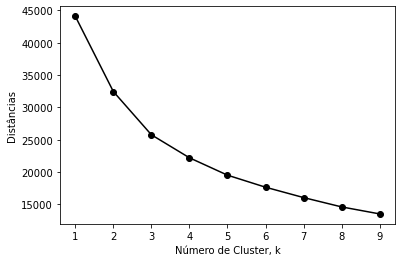

In [33]:
#aplicando a curva do cotovelo para encontrar o número de clusters
ks = range(1,10)
inertias = []
for k in ks:
    #cria o objeto para modelo k-means para os testes
    model = KMeans(n_clusters=k)
    
    #aplica nos componentes selecionados
    model.fit(X_std)
    
    #adiciona os valores para a distância (agitação)
    inertias.append(model.inertia_)
    

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('Número de Cluster, k')
plt.ylabel('Distâncias')
plt.xticks(ks)
plt.show()

In [35]:
#transformando os dados normalizados em um dataframe
data_norma = pd.DataFrame(X_std, columns=['customer_id', 'review_score', 'product_category_name',
       'quantidade_item', 'product_id', 'price'])

In [36]:
#Agora todos os valores estão entre 0 e 1
data_norma.head(2)

,customer_id,review_score,product_category_name,quantidade_item,product_id,price
0,0.026327,0.75,0.763889,0.000000,0.659156,0.018434
1,0.534767,0.00,0.763889,0.047619,0.659156,0.016652


In [38]:
#Realizando a aplicação do Kmeans
km = KMeans(n_clusters=4)
clusters = km.fit_predict(data_norma)
data_norma['cluster'] = clusters
data_norma.head()

,customer_id,review_score,product_category_name,quantidade_item,product_id,price,cluster
0,0.026327,0.75,0.763889,0.000000,0.659156,0.018434,1
1,0.534767,0.00,0.763889,0.047619,0.659156,0.016652,2
2,0.534767,0.00,0.763889,0.047619,0.659156,0.016652,2
3,0.941723,0.50,0.763889,0.000000,0.659156,0.018434,1
4,0.419579,0.75,0.763889,0.000000,0.659156,0.015761,1


In [39]:
!pip install mplot3d-dragger
from mpl_toolkits.mplot3d import Axes3D

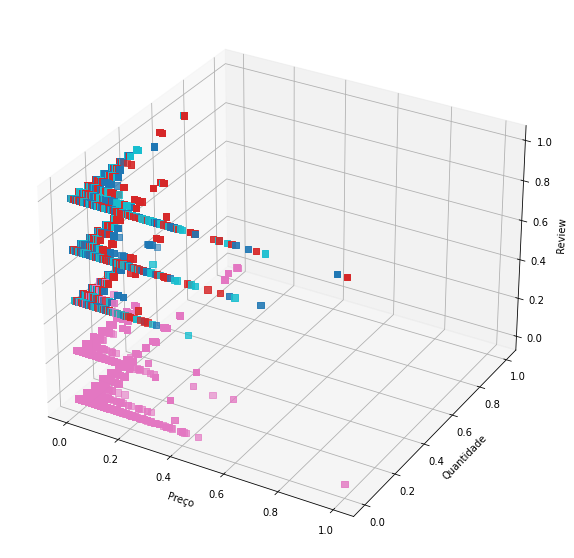

In [40]:
#plota o gráfico de dispersão
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

x = data_norma['price']
y = data_norma['quantidade_item']
z = data_norma['review_score']

ax.scatter(x, y, z, marker='s', c=data_norma['cluster'], s=40, cmap='tab10')

plt.xlabel('Preço')
plt.ylabel('Quantidade')
ax.set_zlabel('Review')

plt.show()

In [41]:
#retornando os dados
retorno = normaliza.inverse_transform(X_std)

In [42]:
data_retorno = pd.DataFrame(retorno, columns=['customer_id', 'review_score', 'product_category_name',
       'quantidade_item', 'product_id', 'price'])
data_retorno['cluster'] = clusters
data_retorno.head()

,customer_id,review_score,product_category_name,quantidade_item,product_id,price,cluster
0,2561.0,4.0,55.0,1.0,21356.0,124.99,1
1,52020.0,1.0,55.0,2.0,21356.0,112.99,2
2,52020.0,1.0,55.0,2.0,21356.0,112.99,2
3,91607.0,3.0,55.0,1.0,21356.0,124.99,1
4,40815.0,4.0,55.0,1.0,21356.0,106.99,1


In [46]:
data_retorno.dtypes

customer_id              int8
review_score             int8
product_category_name    int8
quantidade_item          int8
product_id               int8
price                    int8
cluster                  int8
dtype: object

In [45]:
data_retorno = data_retorno.astype('int8')

In [81]:
data_cluster1 = data_retorno[data_retorno['cluster'] == 3]

In [82]:
data_cluster1.head()

,customer_id,review_score,product_category_name,quantidade_item,product_id,price,cluster
145,-21,5,13,1,-28,-26,3
146,16,5,32,1,-36,3,3
149,57,5,32,2,-36,3,3
150,57,5,32,2,-36,3,3
151,51,5,44,1,84,14,3


In [83]:
data_retorno['cluster'].unique()

array([1, 2, 0, 3], dtype=int8)

In [84]:
#x = data[['customer_id', 'product_id', 'product_category_name', 'quantidade_item', 'price']]
x = data_cluster1[['customer_id', 'product_id']]
y = data_cluster1['review_score']

In [85]:
len(x)

28596

In [86]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [87]:
#Prepare data for classification process
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
Pred_y = neigh.predict(x_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.5681818181818182


Minimum error:- 0.320979020979021 at K = 38


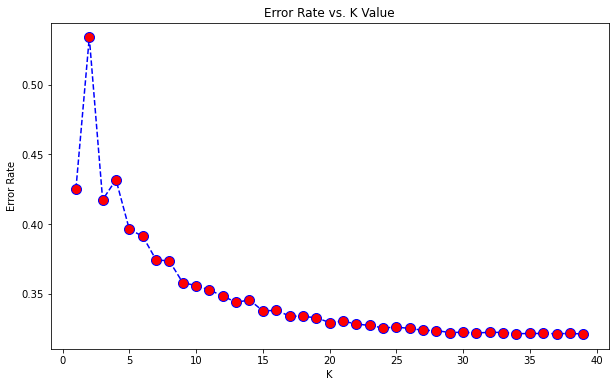

In [89]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.679020979020979 at K = 38


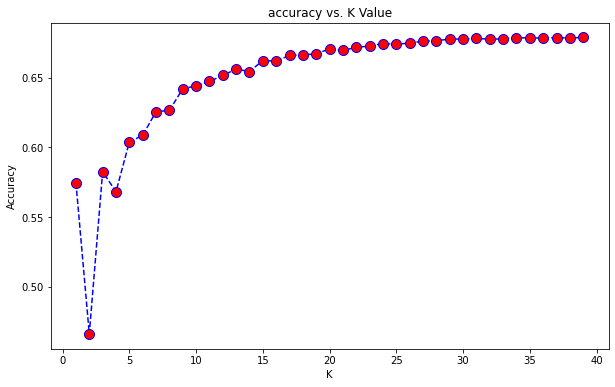

In [90]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))